Denominar la notebook reemplazando NN con el número de su grupo. 

En esta celda colocar Apellido y Nombres de cada uno de los integrantes del grupo que realizan la entrega de este trabajo:

Grupo 9

- Flores Diego
- Mengual Matias
- Villagra Ignacio
- Parada Larrosa Francisco

ENUNCIADO:

SPY son las siglas de un Fondo que sigue el índice de Standard & Poor 500 y que cotiza en bolsa. Nos proponemos analizar una serie de tiempo con datos históricos de este Fondo. 

Las siguientes celdas son un paso a paso para realizar este análisis.

In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

from arch import arch_model

%matplotlib inline

#import yfinance as yf
from pandas_datareader import data

In [2]:
df_spy = data.get_data_yahoo("SPY", start="2010-01-01", end="2020-12-31")

In [3]:
df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,88.860397
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,89.095634
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,89.158340
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,89.534676
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,89.832634


In [4]:
precios = df_spy["Close"]

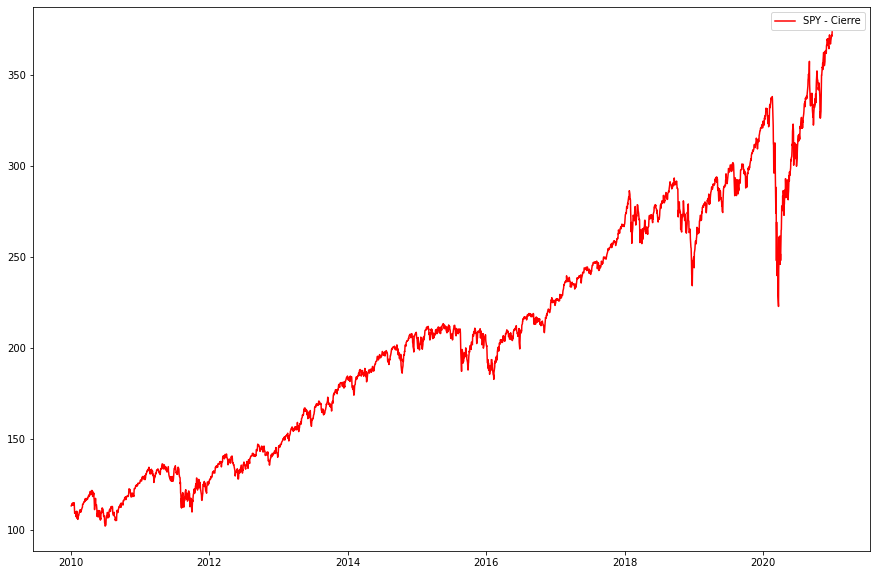

In [5]:
lrets = pd.DataFrame( )
lrets["Log Rets"] =  np.log(precios / precios.shift(1))

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 10))
ax1.plot(precios, color = 'r',label = 'SPY - Cierre')
ax1.legend(loc = 'best')

plt.show()

In [6]:
###¿Diría que es una serie estacionaria? ¿Qué información le indica el test de adfuller?

adfuller(df_spy["Close"])

(0.47463328920182424,
 0.9840813577830141,
 27,
 2741,
 {'1%': -3.4327379732269048,
  '5%': -2.862595034666578,
  '10%': -2.567331628897652},
 12435.932686228805)



A simple vista podemos apreciar que no se trata de una serie estacionaria. Tanto la media como la varianza varían con el tiempo.







In [7]:
## En tres La siguiente función puede utilizarse para analizar tres gráficos: la serie, la función 
## autocorrelación y la función de autocorrelación parcial

def tsplot(y, lags=None, figsize=(15, 10), style='bmh', titulo = 'Time Series Analysis Plots'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(titulo)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [8]:
## retornos
rets = ((precios-precios.shift(1))/precios.shift(1)).dropna()

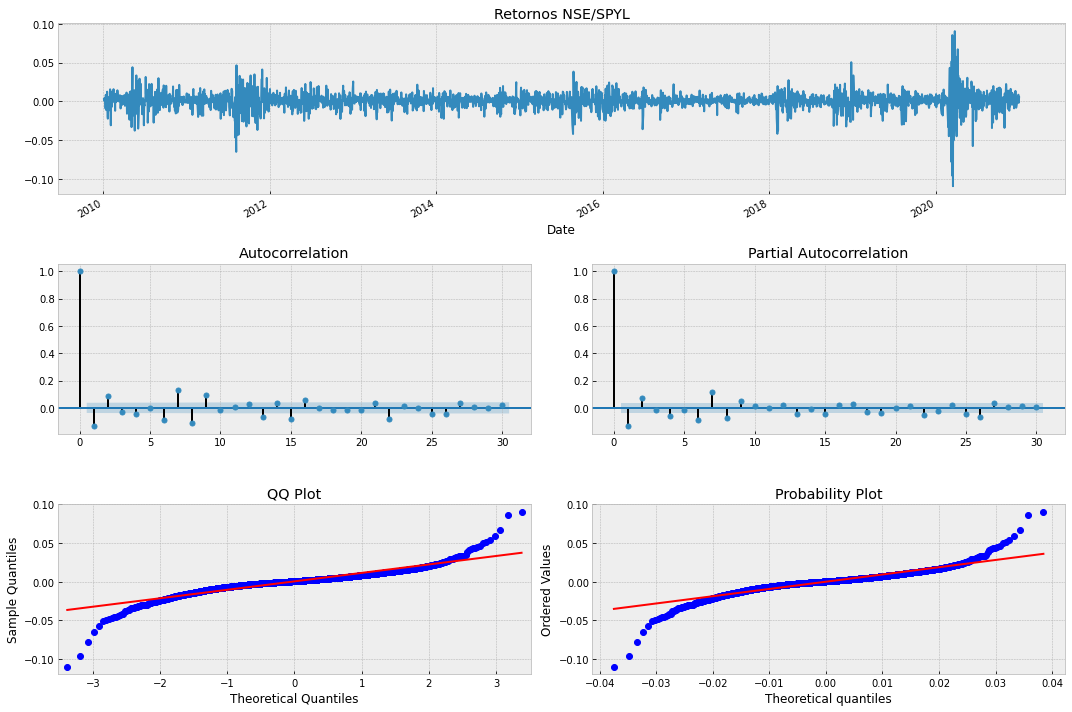

In [9]:
tsplot(rets, lags = 30, titulo = "Retornos NSE/SPYL")

In [12]:
### Según el test de Dickey Fuller, ¿a qué nivel de confianza se puede rechazar la hipótesis nula
##de la existencia de una raíz unitaria en la serie de logretornos? 



Luego de aplicar el test Augmented Dickey-Fuller podemos corroborar lo deducido graficamente. En este test la hipotesis Nula es que la serie tiene una raíz unitaria y por lo tanto no es estacionaria. Para rechazar la hipótesis nula, el p-valor obtenido debería ser menor al nivel de significancia del test.
Analizando lo valores obtenidos vemos que el P-Valor de 0,98 es mucho mayor a cualquier nivel de significancia.

In [10]:
## Con la función ar_select_order indique qué modelo AR(p) podría ajustarse a la serie de los logretornos.
## Utilice el gráfico de PACF para indicar si el resultado es coincidente con lo observado en las autocorrelaciones
## parciales. 
lrets = np.log(precios/precios.shift(1)).dropna()

sel = ar_select_order(lrets, 12, glob=True, old_names=False)

res = sel.model.fit()
print(res.summary())



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 2768
Model:              Restr. AutoReg(9)   Log Likelihood                8610.300
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Thu, 08 Dec 2022   AIC                             -9.074
Time:                        14:27:40   BIC                             -9.057
Sample:                             9   HQIC                            -9.067
                                 2768                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.124      0.034    3.35e-05       0.001
Close.L1      -0.1010      0.019     -5.325      0.000      -0.138      -0.064
Close.L2       0.0664      0.019      3.512      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


El método ar_select_order nos devuelve que el orden del modelo debería ser p = 9. Si vemos el Gráfico de Autocorrelación Parcial, efectivamente podemos ver que el lag 9 es el último de importancia para predecir el valor actual.

In [11]:
sel.ar_lags

array([1, 2, 6, 7, 8, 9])

In [ ]:
## Ajuste el modelo al AR(P) que corresponda. ¿Cuál es el valor del criterio de información de Akaike?
## Hacer

A continuación calcularemos el valor del criterio de información de Akaike (AIC) para diferentes valor de p para poder elegir con mas certeza el orden del modelo.

In [12]:
import warnings
warnings.filterwarnings('ignore')
for i in sel.ar_lags:
  modelo = sm.tsa.arima.ARIMA(lrets, order=(i,0,0)).fit()    #ensamblamos un modelo AR de orden i
  aic = modelo.aic
  print("El valor AIC del modelo AR de orden " + str(i) + " es " + str(aic))

El valor AIC del modelo AR de orden 1 es -17181.673235745362
El valor AIC del modelo AR de orden 2 es -17196.941354314717
El valor AIC del modelo AR de orden 6 es -17218.05174220675
El valor AIC del modelo AR de orden 7 es -17251.776976923247
El valor AIC del modelo AR de orden 8 es -17263.830597197593
El valor AIC del modelo AR de orden 9 es -17269.372142105793


En función del criterio de AIC, efectivamente el orden del modelo igual a 9 es el del menor valor y por lo tanto es el que deberiamos seleccionar. No obstante, vemos que la diferencia de valor AIC entre el modelo de orden 2 y 9 no es demasiado significativa, mientras que un modelo de orden 9 sí es significativamente mas complejo que un modelo de orden 2. Teniendo esto en consideración nos decidimos por establecer el orden del modelo  p = 2. 

In [13]:

modelo = sm.tsa.arima.ARIMA(lrets, order=(2,0,0)).fit()
print(modelo.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2768
Model:                 ARIMA(2, 0, 0)   Log Likelihood                8602.471
Date:                Thu, 08 Dec 2022   AIC                         -17196.941
Time:                        14:28:31   BIC                         -17173.238
Sample:                             0   HQIC                        -17188.380
                               - 2768                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.985      0.047    5.32e-06       0.001
ar.L1         -0.1228      0.008    -14.999      0.000      -0.139      -0.107
ar.L2          0.0789      0.007     10.784      0.0

In [16]:
## Analice ahora los residuos en este ajuste. ¿Diría que están correlacionados? 
## ¿Qué puede decir de los cuadrados de los residuos? ¿Se observa correlación? 

##  Si lo considera apropiado, ajuste los residuos a un modelo ARCH o GARCH. 


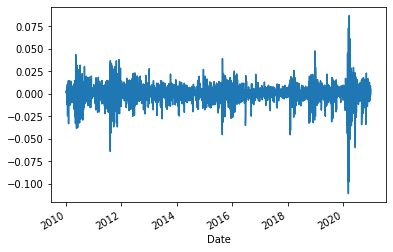

In [14]:
residuos = modelo.resid
residuos.plot()

En la gráfica de los residuos podemos ver que la media es paorximadamente 0. No obstante, la varianza de los residuos no lo es.

From the acf plot, we can see it’s almost the Gaussian White Noise Process. The values of ACF almost fall inside the dashed lines except lag 8 and lag 29. So we conclude that the autocorelation of residuals are zero.

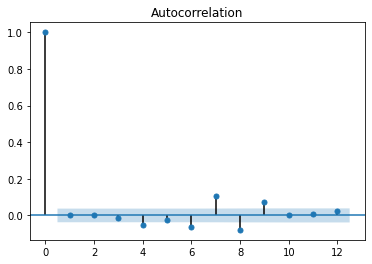

In [15]:
smt.graphics.plot_acf(residuos, lags=12, alpha=0.05);


Analizando la autocorrelación de los residuos podemos observar claramente que no existe tal correlación. La autocorrelación para todos los lags cae dentro de la zona sin significacia estadística. 

In [16]:
am = arch_model(modelo.resid, rescale = False)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     63,   Neg. LLF: 5.528760139763899e+16
Iteration:     10,   Func. Count:    125,   Neg. LLF: 2.291075774767051e+23
Optimization terminated successfully    (Exit mode 0)
            Current function value: 56.33601364138292
            Iterations: 16
            Function evaluations: 154
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -56.3360
Distribution:                  Normal   AIC:                           120.672
Method:            Maximum Likelihood   BIC:                           144.376
                                        No. Observations:                 2768
Date:                Thu, Dec 08 2022   Df Residuals:                     2767
Time: 